In [86]:
import csv
import glob
import json
import scipy
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
dfs_exposure_pp = []
dfs_exposure_do = []

for res_path in glob.glob('data/results/single_stimuli_dative_simulation/*/*.csv'):
    df = pd.read_csv(res_path)
    dfs_exposure_pp.append(df[df['adaptation_dative'] == 'pp'])
    dfs_exposure_do.append(df[df['adaptation_dative'] == 'do'])

# Sanity check: are modeled constructions more probable than unmodeled?

<Axes: >

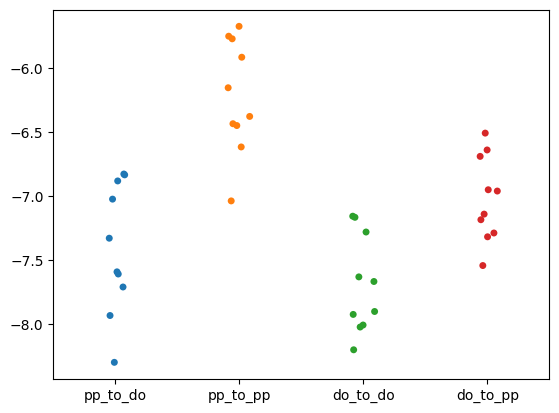

In [23]:
best_do_means_exposure_pp = []
best_pp_means_exposure_pp = []

best_do_means_exposure_do = []
best_pp_means_exposure_do = []

for df in dfs_exposure_pp:
    best_do_means_exposure_pp.append(np.mean(df['best_do_mean']))
    best_pp_means_exposure_pp.append(np.mean(df['best_pp_mean']))

for df in dfs_exposure_do:
    best_do_means_exposure_do.append(np.mean(df['best_do_mean']))
    best_pp_means_exposure_do.append(np.mean(df['best_pp_mean']))

df_means = pd.DataFrame.from_dict(
    data=dict(
        pp_to_do=best_do_means_exposure_pp,
        pp_to_pp=best_pp_means_exposure_pp,
        do_to_do=best_do_means_exposure_do,
        do_to_pp=best_pp_means_exposure_do,
    ),
    orient='index',
).T

sns.stripplot(data=df_means)

<Axes: >

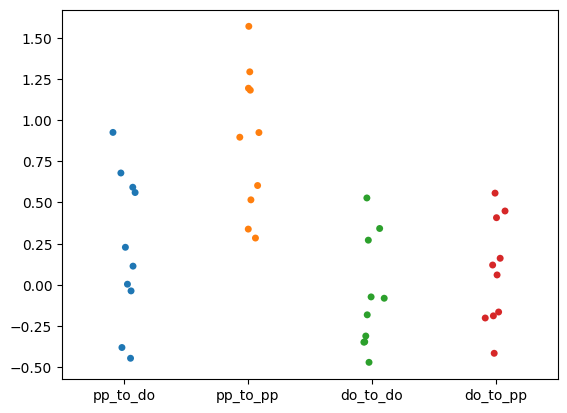

In [26]:
best_do_means_exposure_pp = []
best_pp_means_exposure_pp = []

best_do_means_exposure_do = []
best_pp_means_exposure_do = []

for df in dfs_exposure_pp:
    best_do_means_exposure_pp.append(np.mean(df['best_do_mean']) - np.mean(df['initial_do_mean']))
    best_pp_means_exposure_pp.append(np.mean(df['best_pp_mean']) - np.mean(df['initial_pp_mean']))

for df in dfs_exposure_do:
    best_do_means_exposure_do.append(np.mean(df['best_do_mean']) - np.mean(df['initial_do_mean']))
    best_pp_means_exposure_do.append(np.mean(df['best_pp_mean']) - np.mean(df['initial_pp_mean']))

df_means = pd.DataFrame.from_dict(
    data=dict(
        pp_to_do=best_do_means_exposure_pp,
        pp_to_pp=best_pp_means_exposure_pp,
        do_to_do=best_do_means_exposure_do,
        do_to_pp=best_pp_means_exposure_do,
    ),
    orient='index',
).T

sns.stripplot(data=df_means)

<Axes: >

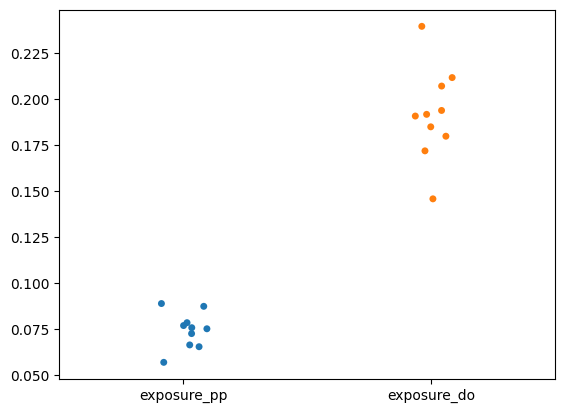

In [25]:
best_do_prefs_exposure_pp = []
best_do_prefs_exposure_do = []

for df in dfs_exposure_pp:
    best_do_prefs_exposure_pp.append(np.mean(df['best_do_pref']))

for df in dfs_exposure_do:
    best_do_prefs_exposure_do.append(np.mean(df['best_do_pref']))

df_prefs = pd.DataFrame.from_dict(
    data=dict(
        exposure_pp=best_do_prefs_exposure_pp,
        exposure_do=best_do_prefs_exposure_do,
    ),
    orient='index',
).T

sns.stripplot(data=df_prefs)

<Axes: >

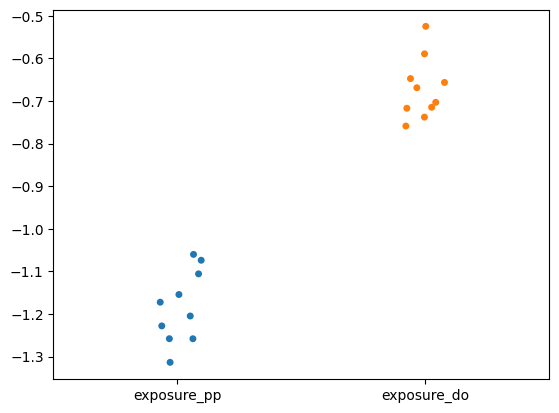

In [27]:
# logprob(DO) - logprob(PP)

best_do_prefs_exposure_pp = []
best_do_prefs_exposure_do = []

for df in dfs_exposure_pp:
    best_do_prefs_exposure_pp.append(np.mean(df['best_delta']))

for df in dfs_exposure_do:
    best_do_prefs_exposure_do.append(np.mean(df['best_delta']))

df_prefs = pd.DataFrame.from_dict(
    data=dict(
        exposure_pp=best_do_prefs_exposure_pp,
        exposure_do=best_do_prefs_exposure_do,
    ),
    orient='index',
).T

sns.stripplot(data=df_prefs)

# Known feature - effect of pronominality

In [38]:
item_to_meta = {}

with open('data/experiments/adaptation.jsonl') as f:
    for line in f:
        line_d = json.loads(line)
        item_to_meta[line_d['item']] = line_d

item_to_meta[1]

{'item': 1,
 'hypothesis_id': 1,
 'hypothesis_instance': 1,
 'theme_pronominality': 'pronoun',
 'theme_animacy': 'animate',
 'theme_length': 'short',
 'recipient_pronominality': 'pronoun',
 'recipient_animacy': 'animate',
 'recipient_length': 'short',
 'agent': 'mommy',
 'theme': 'me',
 'recipient': 'her',
 'do': 'mommy [verb] her me .',
 'pp': 'mommy [verb] me to her .'}

# pron_recip

In [75]:
pronominality_indices = {
    '+pron_recip': [],
    '-pron_recip': []
}

for key, d in item_to_meta.items():
    pron_recip = d['recipient_pronominality']
    pron_theme = d['theme_pronominality']
    if pron_recip == 'pronoun':
        pronominality_indices['+pron_recip'].append(key)
    elif pron_recip == 'nominal':
        pronominality_indices['-pron_recip'].append(key)

print(pronominality_indices)

{'+pron_recip': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 31, 32, 33, 34, 35, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155], '-pron_recip': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]}


## Plotting just means of each  model

-7.262101804769815 0.502930293109888
-7.467547785100481 0.487196572032919
[-7.182547127321168, -6.482829014171254, -6.767726680427403, -6.658115673424364, -7.686049165094054, -7.570785483539878, -7.033474437812704, -7.949946161437342, -7.971343169422893, -7.3182011350470715]
TtestResult(statistic=0.8802139179591661, pvalue=0.3903444456871744, df=18.0)


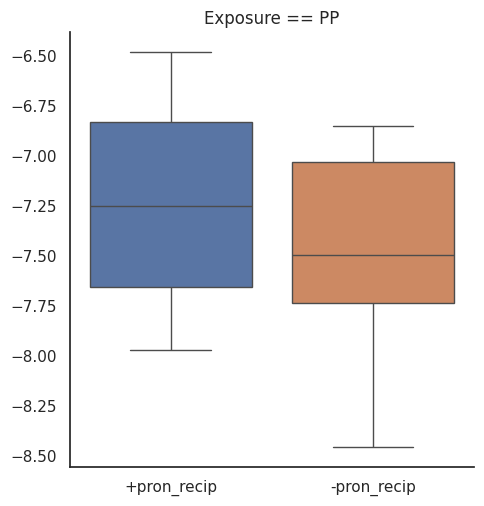

In [103]:
pronominality_data = {key: [] for key in pronominality_indices.keys()}

for df in dfs_exposure_pp:
    for key in pronominality_data.keys():
        pronominality_data[key].append(np.mean(df[df['item'].isin(pronominality_indices[key])]['best_do_mean']))


pp_to_do_pronominality = pd.DataFrame.from_dict(
    data=dict(pronominality_data),
    orient='index',
).T

sns.set(rc={'figure.figsize':(20, 15)})
sns.set_theme(style='white')
fig = sns.catplot(data=pp_to_do_pronominality, kind='box', height=5, aspect=1).set(title='Exposure == PP')

print(np.mean(pp_to_do_pronominality['+pron_recip']), np.std(pp_to_do_pronominality['+pron_recip']))
print(np.mean(pp_to_do_pronominality['-pron_recip']), np.std(pp_to_do_pronominality['-pron_recip']))

print(scipy.stats.ttest_ind(pp_to_do_pronominality['+pron_recip'], pp_to_do_pronominality['-pron_recip']))

## all datapoints as pointplot

-7.262101804769812 1.4530704466368793
-7.467547785100484 1.4982688779734736
TtestResult(statistic=2.686620652183859, pvalue=0.007286257331619049, df=1748.0)


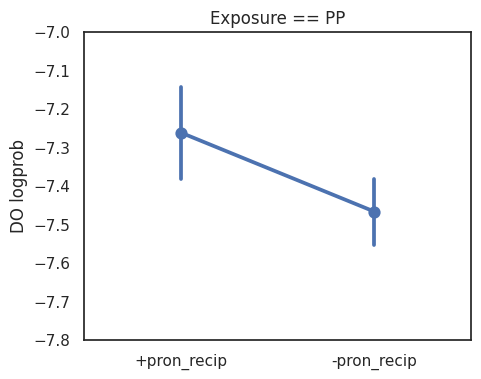

In [142]:
pronominality_data = {key: [] for key in pronominality_indices.keys()}

for df in dfs_exposure_pp:
    for key in pronominality_data.keys():
        l = list(df[df['item'].isin(pronominality_indices[key])]['best_do_mean'])
        pronominality_data[key].extend(l)

pp_to_do_pronominality = pd.DataFrame.from_dict(
    data=dict(pronominality_data),
    orient='index',
).T

sns.set(rc={'figure.figsize':(5, 4)})
sns.set_theme(style='white')
fig = sns.pointplot(data=pp_to_do_pronominality)
fig.set(ylim=(-7.8, -7))
fig.set(title='Exposure == PP', ylabel="DO logprob")

print(np.mean(pp_to_do_pronominality['+pron_recip'].dropna()), np.std(pp_to_do_pronominality['+pron_recip'].dropna()))
print(np.mean(pp_to_do_pronominality['-pron_recip'].dropna()), np.std(pp_to_do_pronominality['-pron_recip'].dropna()))

print(scipy.stats.ttest_ind(pp_to_do_pronominality['+pron_recip'].dropna(), pp_to_do_pronominality['-pron_recip'].dropna()))
fig.get_figure().savefig("pron_recipient_pp_to_do.pdf", bbox_inches='tight') 

-6.51693562810483 1.3374221385139482
-7.253952783283166 1.5107839212503298
TtestResult(statistic=9.807754299724609, pvalue=3.8386689637659285e-22, df=1748.0)


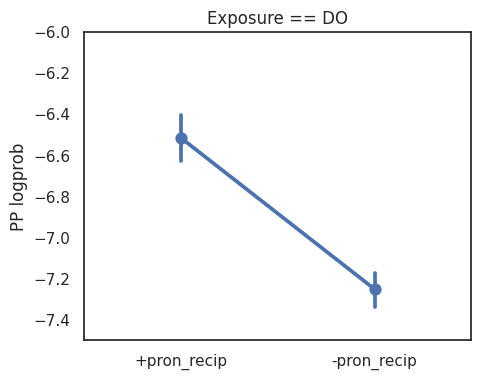

In [145]:
pronominality_data = {key: [] for key in pronominality_indices.keys()}

for df in dfs_exposure_do:
    for key in pronominality_data.keys():
        l = list(df[df['item'].isin(pronominality_indices[key])]['best_pp_mean'])
        pronominality_data[key].extend(l)

pp_to_do_pronominality = pd.DataFrame.from_dict(
    data=dict(pronominality_data),
    orient='index',
).T

sns.set(rc={'figure.figsize':(5, 4)})
sns.set_theme(style='white')
fig = sns.pointplot(data=pp_to_do_pronominality)
fig.set(ylim=(-7.5, -6))
fig.set(title='Exposure == DO', ylabel="PP logprob")

print(np.mean(pp_to_do_pronominality['+pron_recip'].dropna()), np.std(pp_to_do_pronominality['+pron_recip'].dropna()))
print(np.mean(pp_to_do_pronominality['-pron_recip'].dropna()), np.std(pp_to_do_pronominality['-pron_recip'].dropna()))

print(scipy.stats.ttest_ind(pp_to_do_pronominality['+pron_recip'].dropna(), pp_to_do_pronominality['-pron_recip'].dropna()))
fig.get_figure().savefig("pron_recipient_do_to_pp.pdf", bbox_inches='tight') 

# Animacy

In [140]:
animacy_indices = {
    '+animate_recip': [],
    '-animate_recip': []
}

for key, d in item_to_meta.items():
    animate_recip = d['recipient_animacy']
    if animate_recip == 'animate':
        animacy_indices['+animate_recip'].append(key)
    elif animate_recip == 'inanimate':
        animacy_indices['-animate_recip'].append(key)

print(animacy_indices)

{'+animate_recip': [1, 2, 3, 4, 5, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 56, 57, 58, 59, 60, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 86, 87, 88, 89, 90, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 116, 117, 118, 119, 120, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 146, 147, 148, 149, 150, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165], '-animate_recip': [6, 7, 8, 9, 10, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 61, 62, 63, 64, 65, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 91, 92, 93, 94, 95, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 121, 122, 123, 124, 125, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 151, 152, 153, 154, 155, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]}


-7.315120162116536 1.501559695384386
-7.496006104516583 1.4662681757336822
TtestResult(statistic=2.546134262652315, pvalue=0.010977488478620172, df=1748.0)


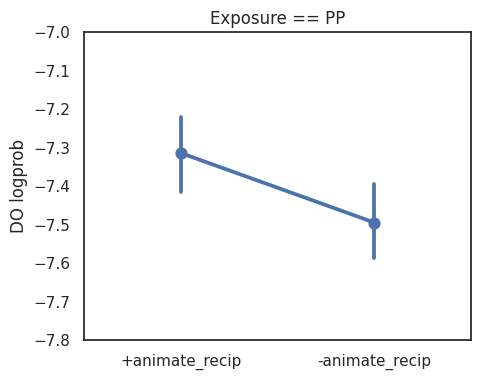

In [148]:
animacy_data = {key: [] for key in animacy_indices.keys()}

for df in dfs_exposure_pp:
    for key in animacy_data.keys():
        l = list(df[df['item'].isin(animacy_indices[key])]['best_do_mean'])
        animacy_data[key].extend(l)

pp_to_do_animacy = pd.DataFrame.from_dict(
    data=dict(animacy_data),
    orient='index',
).T

sns.set(rc={'figure.figsize':(5, 4)})
sns.set_theme(style='white')
fig = sns.pointplot(data=pp_to_do_animacy)
fig.set(ylim=(-7.8, -7))
fig.set(title='Exposure == PP', ylabel="DO logprob")

print(np.mean(pp_to_do_animacy['+animate_recip'].dropna()), np.std(pp_to_do_animacy['+animate_recip'].dropna()))
print(np.mean(pp_to_do_animacy['-animate_recip'].dropna()), np.std(pp_to_do_animacy['-animate_recip'].dropna()))

print(scipy.stats.ttest_ind(pp_to_do_animacy['+animate_recip'].dropna(), pp_to_do_animacy['-animate_recip'].dropna()))
fig.get_figure().savefig("animate_recipient_pp_to_do.pdf", bbox_inches='tight') 

# Animacy 4-way

In [149]:
animacy_indices = {
    '+animate_recip, -animacy_theme': [],
    '-animate_recip, -animacy_theme': [],
    '+animate_recip, +animacy_theme': [],
    '-animate_recip, +animacy_theme': []
}

for key, d in item_to_meta.items():
    animate_recip = d['recipient_animacy']
    animate_theme = d['theme_animacy']
    if animate_recip == 'animate' and animate_theme == 'inanimate':
        animacy_indices['+animate_recip, -animacy_theme'].append(key)
    elif animate_recip == 'inanimate' and animate_theme == 'inanimate':
        animacy_indices['-animate_recip, -animacy_theme'].append(key)
    elif animate_recip == 'animate' and animate_theme == 'animate':
        animacy_indices['+animate_recip, +animacy_theme'].append(key)
    elif animate_recip == 'inanimate' and animate_theme == 'animate':
        animacy_indices['-animate_recip, +animacy_theme'].append(key)

print(animacy_indices)

{'+animate_recip, -animacy_theme': [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 116, 117, 118, 119, 120, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 146, 147, 148, 149, 150, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165], '-animate_recip, -animacy_theme': [46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 121, 122, 123, 124, 125, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 151, 152, 153, 154, 155, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175], '+animate_recip, +animacy_theme': [1, 2, 3, 4, 5, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 56, 57, 58, 59, 60, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 86, 87, 88, 89, 90, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105], '-animate_recip, +animacy_theme': [6, 7, 8, 9, 10, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 61, 62, 63, 64, 65, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 91, 92, 93, 94, 95, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]}


/scratch/231173.1.ood/ipykernel_879923/898838531.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([


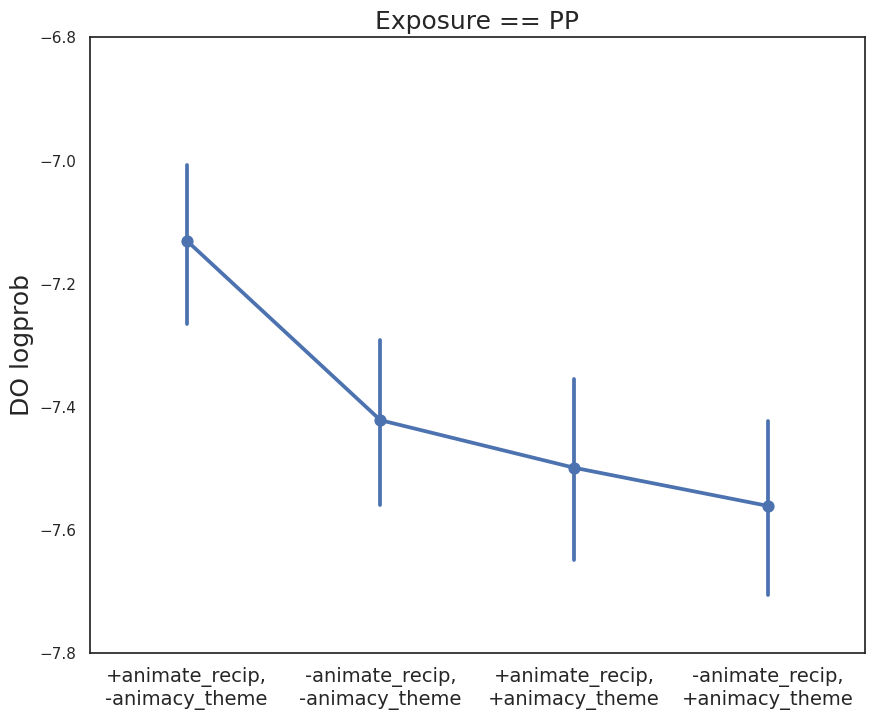

In [163]:
animacy_data = {key: [] for key in animacy_indices.keys()}

for df in dfs_exposure_pp:
    for key in animacy_data.keys():
        l = list(df[df['item'].isin(animacy_indices[key])]['best_do_mean'])
        animacy_data[key].extend(l)

pp_to_do_animacy = pd.DataFrame.from_dict(
    data=dict(animacy_data),
    orient='index',
).T

sns.set(rc={'figure.figsize':(10, 8)})
sns.set_theme(style='white')
fig = sns.pointplot(data=pp_to_do_animacy)
fig.set(ylim=(-7.8, -6.8))
fig.set_title('Exposure == PP', fontsize=18)
fig.set_ylabel('DO logprob', fontsize=18)
fig.set_xticklabels([
    '+animate_recip,\n-animacy_theme', 
    '-animate_recip,\n-animacy_theme',
    '+animate_recip,\n+animacy_theme',
    '-animate_recip,\n+animacy_theme',
], fontsize=14)

# print(np.mean(pp_to_do_animacy['+animate_recip'].dropna()), np.std(pp_to_do_animacy['+animate_recip'].dropna()))
# print(np.mean(pp_to_do_animacy['-animate_recip'].dropna()), np.std(pp_to_do_animacy['-animate_recip'].dropna()))

# print(scipy.stats.ttest_ind(pp_to_do_animacy['+animate_recip'].dropna(), pp_to_do_animacy['-animate_recip'].dropna()))
fig.get_figure().savefig("recipient_theme_animacy_pp_to_do.pdf", bbox_inches='tight') 